**

# Minit Project 1 - Anticipating credit card churn

## Business context

Macquarie Bank’s Credit Card Manager is uncomfortable with more and more customers leaving their Ratesaver credit card service. They would really appreciate it if someone could predict who will be affected so that they can proactively go to the customer to provide them with a better services and turn customer decisions in the opposite direction. 

## Business question - Can we anticipate credit card churn?

Can We Anticipate Churn on Macquarie Bank Credit Cards?

## Data pipeline

The data in is a standard CSV file from The Macquarie Bank Credit Card Manager.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Step 1. Import data

In [100]:
df = pd.read_csv('predicting-credit-card-churn-ReedBank.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Summary

- **Attrition Flag**: This is our target variable, means whether our customer decided to leave the organization or that there is a high probability the customer will leave.
- **Gender**: Male or Female
- **Customer age**: Age of the customer
- **Income category**: To which income category does the customer belongs to.
- **Card category**: Which card category does the customer have?
- **Months Inactive**: Amount of inactivity when using the credit card.
- **Credit Limit**: Credit Limit the customer currently has.
- **Total Revolving Balance**: The unpaid portion that carries over to the next month when a customer does not pay.
- **Average Utiliwation Ratio**: Measures how much credit you are using compared to how much you have available.
- **Open to buy**: The amount of credit available at a given time on a credit card holders account. Thus, the average open to buy is the average credit available allocated to a specific customer.

## Step 2. Data cleaning

In [101]:
df.shape

(10127, 23)

In [102]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [103]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [104]:
print('Number of missing values by column:')
df.isna().sum()

Number of missing values by column:


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [105]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [106]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

In [107]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [108]:
df = df.mask(df.eq('Unknown')).dropna()
print('After filtration {} remains for anlysis'.format(df.shape[0]))
# Removed empty rows

After filtration 7081 remains for anlysis


In [109]:
df.rename(columns = {'Customer_Age': 'Age', 'Education_Level' : 'Education'}, inplace = True)
df.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependent_count,Education,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [110]:
display('Categories of incomes:',df['Income_Category'].value_counts())

'Categories of incomes:'

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

In [111]:
# Replace the categories with labels which describes the level of income
income_categories_labels = {'Less than $40K' : 'low', '$40K - $60K' : 'medium',
                            '$60K - $80K': 'above medium', '$80K - $120K':'high', '$120K +' : 'very high'}
df['Income_Category'] = df['Income_Category'].replace(income_categories_labels)
# Display the counts of the the new income labels
df['Income_Category'].value_counts()

low             2792
medium          1412
high            1202
above medium    1103
very high        572
Name: Income_Category, dtype: int64

In [112]:
encoder = LabelEncoder()
df['Attrition_Flag'] = encoder.fit_transform(df['Attrition_Flag'])
df.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependent_count,Education,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,above medium,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,low,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,high,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,1,40,M,3,Uneducated,Married,above medium,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,M,2,Graduate,Married,medium,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


## Step 3. EDA - Exporatory data analysis

## What can we tell from the mean?

In the given dataset, you have two types of customers one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both.


In [113]:
left = df.groupby('Attrition_Flag')
left.mean()

,CLIENTNUM,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
0,7.355905e+08,46.510332,2.371968,36.152740,3.298293,2.694519,2.950584,8158.579964,668.353998,7490.225966,0.692021,3106.296496,44.807727,0.556502,0.163571
1,7.397449e+08,46.317359,2.331434,35.949397,3.916555,2.276977,2.361930,8555.099196,1260.589980,7294.509216,0.773370,4634.505529,68.176441,0.740415,0.304458


In [114]:
df.describe()

,CLIENTNUM,Attrition_Flag,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,0.842819,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,3.685244e+07,0.363997,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130105e+08,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,7.178438e+08,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,7.732370e+08,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,8.282989e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


## How many customers have churned?

In [115]:
df.Attrition_Flag.value_counts()


1    5968
0    1113
Name: Attrition_Flag, dtype: int64

## Was there a product issue?

The cheapest is clearly used most. So we're dealing with price buyers. Which means they are focused on cost, but from looking at this the pricing of the tiers is broken.

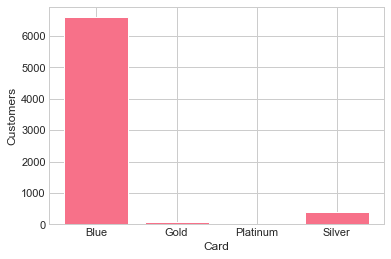

In [116]:
revbal=df.groupby('Card_Category').count()
plt.bar(revbal.index.values, revbal['Attrition_Flag'])
plt.xlabel('Card')
plt.ylabel('Customers')
plt.show()

## There is a clear median but the median isn't the full story

We can rule out the product being the real problem though. Going on my gut, I'd say it's a customer service or price issue.

Text(0, 0.5, 'Test')

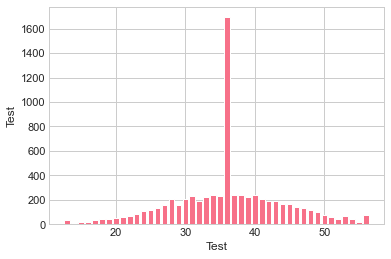

In [117]:
revbal=df.groupby('Months_on_book').count()
plt.bar(revbal.index.values, revbal['Attrition_Flag'])
plt.xlabel('Test')
plt.ylabel('Test')

## Card type


In [118]:
df.groupby('Income_Category')['Card_Category'].value_counts()

Income_Category  Card_Category
above medium     Blue             1006
                 Silver             72
                 Gold               22
                 Platinum            3
high             Blue             1088
                 Silver             98
                 Gold               16
low              Blue             2669
                 Silver            101
                 Gold               19
                 Platinum            3
medium           Blue             1327
                 Silver             74
                 Gold               10
                 Platinum            1
very high        Blue              508
                 Silver             46
                 Gold               14
                 Platinum            4
Name: Card_Category, dtype: int64

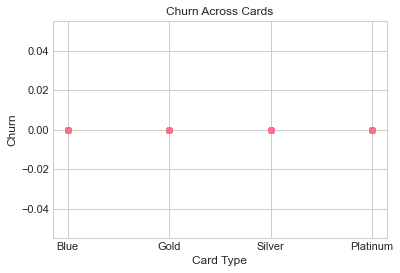

In [119]:
# Card type churn
churned = [df['Attrition_Flag'] == '0']   

import matplotlib.pyplot as plt
yAxis = churned
xAxis = df['Card_Category']


plt.title('Churn Across Cards') #title of the graph
plt.xlabel('Card Type') #title of the x axis
plt.ylabel('Churn') #title of the y axis

plt.scatter(xAxis,yAxis) #show the graph

## I'm curious about Revolving Balance
I need more information from the stakeholders about what it means, but it tapers off over time from the bottom out, which might mean the business isn't addressing a financing issue for the customer. My initial guess is around limits for customers with high incomes.

Text(0.5, 0, 'Time as Customer (Months)')

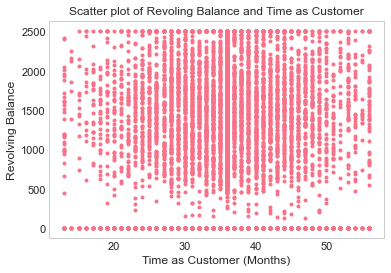

In [120]:
plt.grid()
plt.scatter(y = df.Total_Revolving_Bal, x = df.Months_on_book, marker = '.')
plt.title('Scatter plot of Revoling Balance and Time as Customer')
plt.ylabel('Revolving Balance')
plt.xlabel('Time as Customer (Months)')

In [121]:
## Churned Customers

In [122]:
churn = df[df["Attrition_Flag"] == '0']
non_churn = df[df["Attrition_Flag"] == '1']

In [99]:
churn.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependent_count,Education,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


## Step 4. Findings

### Can We Anticipate Churn?

Yes. 

I'd say high-income earners aren't being pushed to a higher limit soon enough as the primary problem. Too many are focused on the cheap product when you're a premium brand.

## Step 5. Decision Making

1. Focus on the the 2 products immediately higher than blue and incentivise moving up to a higher tier, sooner.
2. Act when activity is low.
3. Increase credit card limits to those with lower revolving balance.